# LAB: Fraud detection - Supervised and Unsupervised approaches
The Banksim dataset as proposed by *Lopez-Rojas, Edgar Alonso ; Axelsson, Stefan
Banksim: A bank payments simulator for fraud detection research Inproceedings
26th European Modeling and Simulation Symposium, EMSS 2014, Bordeaux, France, pp. 144–152, Dime University of Genoa, 2014, ISBN: 9788897999324.* contain7200 Fraud cases and 587443 Non Fraud caseses. The target is categoricalFraud = 1, Non Fraud = 0re).

### Imports

In [187]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, make_scorer, f1_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.inspection import DecisionBoundaryDisplay
#from sklearn.manifold import TSNE
from openTSNE import TSNE
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

### Load dataset
- Load the Banksim dataset and show the first 10 lines

step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3     0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
4     0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   
5     0  'C1315400589'  '3'    'F'    '28007'   'M348934600'     '28007'   
6     0   'C765155274'  '1'    'F'    '28007'   'M348934600'     '28007'   
7     0   'C202531238'  '4'    'F'    '28007'   'M348934600'     '28007'   
8     0   'C105845174'  '3'    'M'    '28007'   'M348934600'     '28007'   
9     0    'C39858251'  '5'    'F'    '28007'   'M348934600'     '28007'   

              category  amount  fraud  
0  'es_transportation'    4.55      0  
1  'es_transportation'   39.68      0  
2  'es_transportation'   26.89      0  
3  'es_transportation'   17.25      0  
4  'es_transportation'   35.72      0  
5  'es_transportation'   25.81      0  
6  'es_transportation'    9.10      0  
7  'es_transportation'   21.17      0  
8  'es_transportation'   32.40      0  
9  'es_transportation'   35.40      0

### Exploratory Data Analysis

- Give the shape of the dataset
- What are the column types?
- Check for unique and missing values
- Drop columns with only one value
- Transform object columns to categorical
- Look at the 'category' column, what do you notice?
- Plot the correlation matrix

The dataset has 594643 rows and 10 features


step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

step             180
customer        4112
age                8
gender             4
zipcodeOri         1
merchant          50
zipMerchant        1
category          15
amount         23767
fraud              2
dtype: int64

step           False
customer       False
age            False
gender         False
zipcodeOri     False
merchant       False
zipMerchant    False
category       False
amount         False
fraud          False
dtype: bool

Index(['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount',
       'fraud'],
      dtype='object')

step  customer  age  gender  merchant  category  amount  fraud
0     0       210    4       2        30        12    4.55      0
1     0      2753    2       2        30        12   39.68      0
2     0      2285    4       1        18        12   26.89      0
3     0      1650    3       2        30        12   17.25      0
4     0      3585    5       2        30        12   35.72      0
5     0       694    3       1        30        12   25.81      0
6     0      3609    1       1        30        12    9.10      0
7     0      2227    4       1        30        12   21.17      0
8     0       126    3       2        30        12   32.40      0
9     0      2853    5       1        30        12   35.40      0

category
0     0.018829
1     0.000000
2     0.017973
3     0.000000
4     0.105126
5     0.152064
6     0.314220
7     0.045917
8     0.949900
9     0.250000
10    0.495252
11    0.066667
12    0.000000
13    0.793956
14    0.047594
Name: fraud, dtype: float64

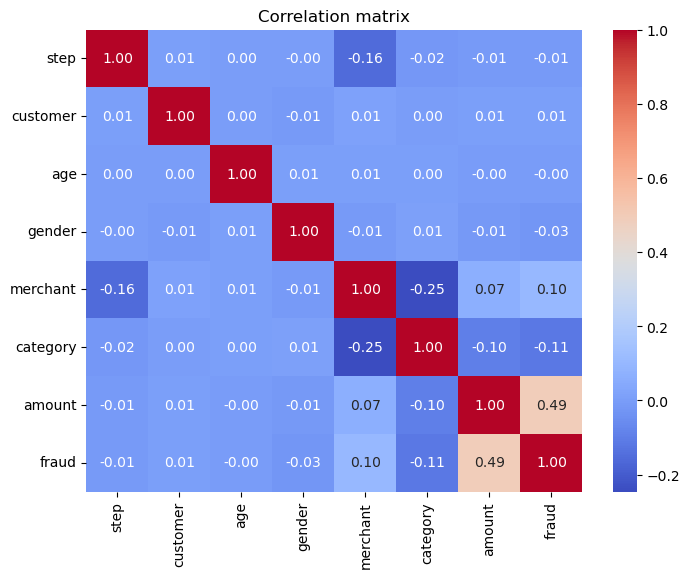

### Split and normalize the dataset
- Split the data into Train-Test-Validation
- Normalize the 'amount' column with a MinMaxScaler
- Train an XGBClassifier, LogisticRegression, AdaBoostClassifier, KneighborsClassifier, RandomForestclassifier, DecisionTreeClassifier, GradientBoostingClassifier and HistGradientBoostingClassifier
- Perform a Grid Search Cross Validation on the best performing algorithm

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'max_iter': 50, 'n_estimators': 150, 'subsample': 0.9}
Best Accuracy: 0.9961137343623134


- Save the best model in a pickle file

- Predict the values on the Test set, print Accuracy, FP and FN

Accuracy: 99.5476, FP|FN: 268 | 270


- Plot the confusion matrix of the best model

<Axes: >

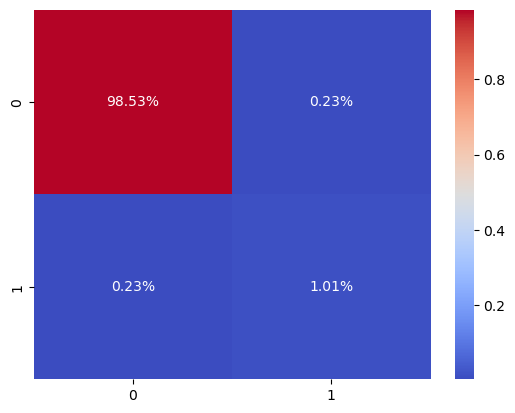

- Perform a T-SNE embedding analysis on a selection (due to the time complexity) of the data
- Visualize the embedding

In [26]:
%time embedding = tsne.fit(X_train[0:10000].to_numpy())

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, learning_rate=200, n_iter=100, n_jobs=4,
     negative_gradient_method='bh', perplexity=50, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 150 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 1.86 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.17 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.07 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 4.2636, 50 iterations in 52.9853 sec
Iteration  100, KL divergence 3.0971, 50 iterations in 53.0961 sec
Iteration  150, KL divergence 2.7946, 50 iterations in 48.3176 sec
Iteration  200, KL divergence 2.6976, 50 iterations in 46.7560 sec
Iteration  250, KL divergence 2.6457, 50 iterations in

x1        x2
0     -4.374351  8.763221
1    -17.642704  3.819063
2      7.829687  7.013806
3      0.515272 -3.985834
4      3.250507  9.931816
...         ...       ...
9995 -12.474638 -7.097709
9996  -3.814851 -4.450166
9997  16.986046 -4.039017
9998  22.500127 -1.546736
9999 -18.095870 -0.613800

[10000 rows x 2 columns]

<Axes: xlabel='x1', ylabel='x2'>

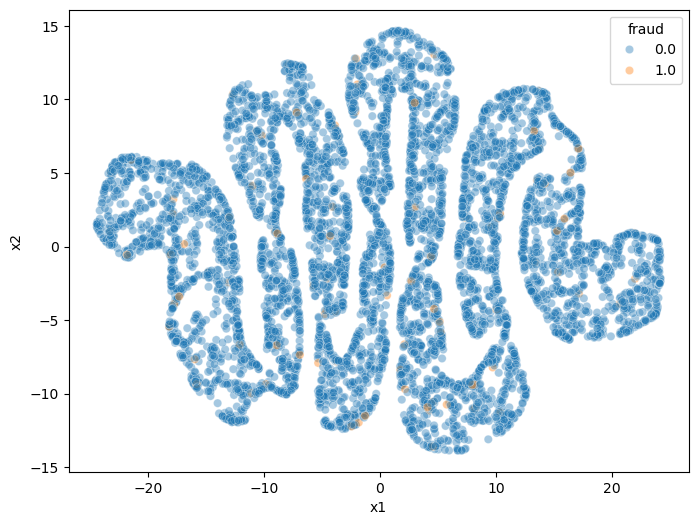

In [29]:
plt.show()

### Unsupervised Outlier Detection

One efficient way of performing outlier detection in high-dimensional datasets is to used an Isolation forest. This type of Random Forest isolates observations by randomly selecting a feature and then randomly selecting a split value between de maximum and minimum values of the fetaure. 

- Train an isolation forest on the columns 'amount' and 'category', these are the columns found from the EDA to correlate with the fraud score.
- Visualize with a Scatter plot the anomaly and anomaly_score
- Visualize the decision boundary (use DecisionBoundaryDisplay), what do you notice? 

IsolationForest(max_samples=100, random_state=22)

fraud
 1    8336
-1    1664
Name: count, dtype: int64

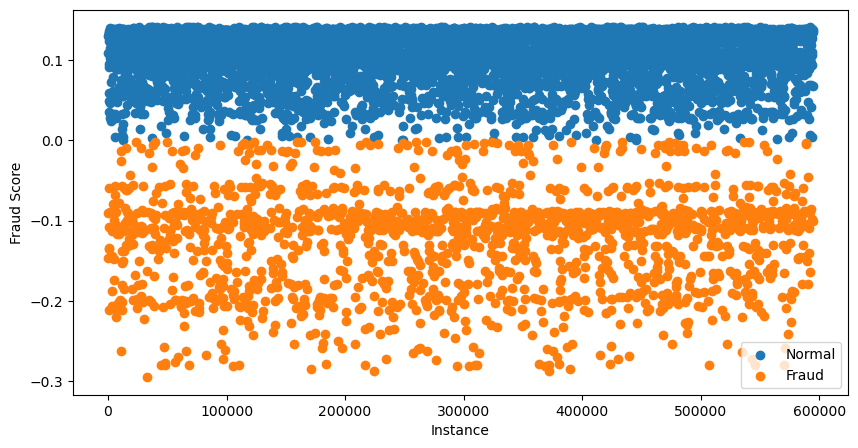

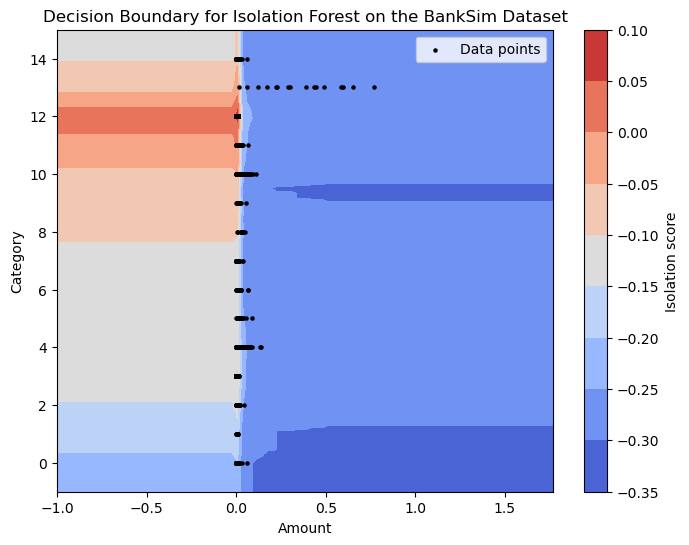

The above isolation forest indicates that the darker blue spots (lower isolation score) suggest outliers. Darker red scores indicate "normal" datapoints. 